<a href="https://colab.research.google.com/github/JennyMyy/Data-analytiikka/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
# Yhdistetään Google driveen

from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive/MyDrive/data

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive/MyDrive/data


In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sns.set_style('whitegrid')

from matplotlib.ticker import PercentFormatter
ticks = PercentFormatter(xmax = 100, decimals = 0, symbol = ' %')

## Sanakirja taulukoiden muotoiluuun
## lukumäärä-sarakkeeseen nolla desimaalio, %-sarakkeeseen yksi desimaali

format = {'lkm' : '{:.0f}', '%' : '{:.1f} %'}

#Titanic matkustajat

In [102]:
# Luetaan tiedosto
df = pd.read_excel('titanic.xlsx')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [104]:
## Sukupuolijakauma
df1 = pd.crosstab(df['sex'], 'lkm')
df1.columns.name = ''
n = df1['lkm'].sum()
df1['%'] = df1['lkm']/n*100
df1.loc['Total'] = df1.sum()

# decimaalien muotoilu
df1.style.format(format)

,lkm,%
sex,,
female,466,35.6 %
male,843,64.4 %
Total,1309,100.0 %


Matkustajia ollut yhteensä 1309 ja enempi miehiä kuin naisia.

In [105]:
# sukupuoli jakauma selviytyneet ja menehtyneet
df1 = pd.crosstab(df['sex'], df['survived'])
selviytyneet = ['ei', 'kyllä']
sukupuoli = ['nainen', 'mies']

df1.columns = selviytyneet
df1.columns.name = 'selviytyi'
df1.index= sukupuoli
df1.index.name = 'sukupuoli'

df1.loc['yhteensä'] = df1.sum()
df1

selviytyi,ei,kyllä
sukupuoli,,
nainen,127,339
mies,682,161
yhteensä,809,500


Text(0.5, 1.0, 'Selviytyneet sukupuolen mukaan')

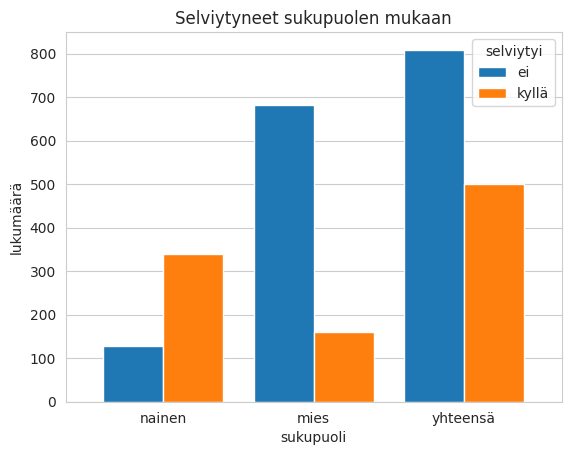

In [106]:
# Ristiintaulukointi pylväinä
df1.plot(kind='bar', width=0.8, rot=0)

plt.ylabel('lukumäärä')
plt.grid(axis='x')

plt.title('Selviytyneet sukupuolen mukaan')

Laivalla menehtyneitä 809 ja selviytyneitä 500, joista selviytyi enemmän naisia.

In [122]:
# Katsotaan kuinka monta ruumista on löydetty

df.nlargest(1, 'body')

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1304,3,0,"Zabour, Miss. Hileni",female,14.5,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"(10, 20]"


Löydetty 328 ruumista ja 481 henkilöä jäi kadoksiin.

#Ikäjakauma

In [108]:
# iän luokittelu
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
df['ageclass'] = pd.cut(df['age'], bins=bins)

df2 = pd.crosstab(df['ageclass'], 'lkm')
df2.columns.name = ''
df2.index.name = 'ikäluokka'
df2

,lkm
ikäluokka,
"(0, 10]",86
"(10, 20]",162
"(20, 30]",361
"(30, 40]",210
"(40, 50]",132
"(50, 60]",62
"(60, 70]",27
"(70, 80]",6


([<matplotlib.axis.XTick at 0x7f98888d9b10>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

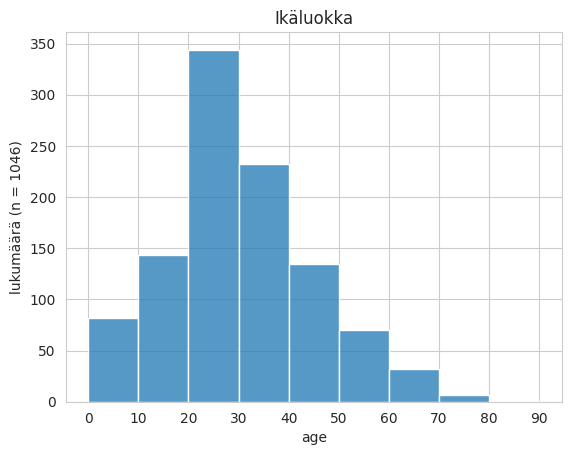

In [123]:
# Pylvästaulukko ikäjakaumasta

plt.title('Ikäluokka')
sns.histplot(df['age'], bins=bins)

plt.ylabel(f'lukumäärä (n = {df["age"].count()})')

# x-akselille luokkien rajakohdat
plt.xticks(bins)

Ikäjakaumasta nähtävillä matkustajia olleen eniten 20-30 vuotiaita. 1046 matkustajan iät tiedossa 1309 matkustajasta.

In [110]:
# ristiintualukointi ikäluokan ja selviytyneiden suhteen.

df2 = pd.crosstab(df['ageclass'], df['survived'])

df2.columns = selviytyneet
df2.columns.name = 'selviytyneet'
df2.index.name = 'ikäluokka'

df2

selviytyneet,ei,kyllä
ikäluokka,,
"(0, 10]",36,50
"(10, 20]",98,64
"(20, 30]",227,134
"(30, 40]",121,89
"(40, 50]",80,52
"(50, 60]",32,30
"(60, 70]",21,6
"(70, 80]",4,2


Text(0.5, 1.0, 'Iän mukaan selviytyneet')

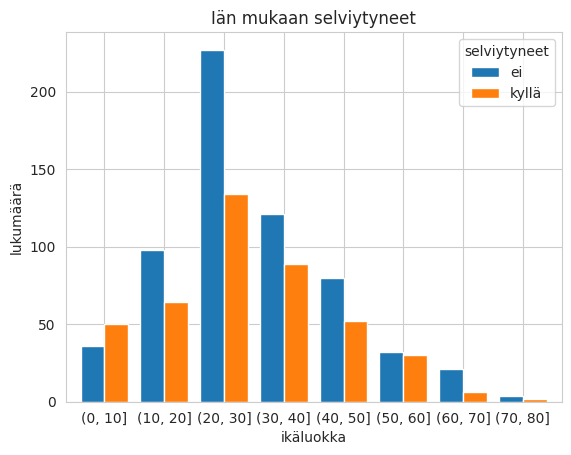

In [111]:
# Ristiintaulukointi pylväinä

df2.plot(kind='bar', width=0.8, rot=0)

plt.ylabel('lukumäärä')
plt.title('Iän mukaan selviytyneet')


Titanicilla eniten selviytyi 20-30 vuotiaat, mutta myös menehtyi eniten. Edellä myös nähtävillä, että 20.30 vuotiaita matkusti eniten Titanicilla.

# Hyttien jakautuminen

In [124]:
# Hyttijakauma

df3 = pd.crosstab(df['pclass'], 'lkm')
hytit = ['first', 'second', 'third']
df3.columns.name = ''
df3.index= hytit
df3.index.name = 'Hytit'
df3['%'] = df3['lkm']/df3['lkm'].sum()*100

df3.loc['Total'] = df3.sum()

df3.style.format(format)

,lkm,%
Hytit,,
first,323,24.7 %
second,277,21.2 %
third,709,54.2 %
Total,1309,100.0 %


Text(0.5, 1.0, 'Hyttien jakauma prosentteina')

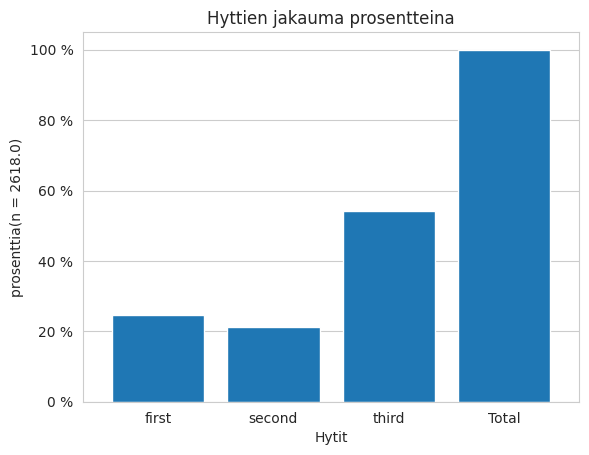

In [113]:
# Hyttien frekvenssitaulukko prosenteissa kaaviossa

df3['%'].plot(kind='bar', width=0.8, rot=0)

plt.ylabel(f'prosenttia(n = {df3["lkm"].sum()})')
plt.gca().yaxis.set_major_formatter(ticks)

plt.grid(axis='x')
plt.title('Hyttien jakauma prosentteina')

Yli puolet matkustajista matkustaneet kolmannessa luokassa laivalla.

In [125]:
# Hyttien ja selviytyneiden taulukko

df3 = pd.crosstab(df['pclass'], df['survived'])

df3.columns = selviytyneet
df3.index = hytit
df3.index.name = 'hytit'
df3.columns.name = 'selviytyneet'

df3

selviytyneet,ei,kyllä
hytit,,
first,123,200
second,158,119
third,528,181


Text(0.5, 1.0, 'Selviytyneet hyttiluokan mukaan')

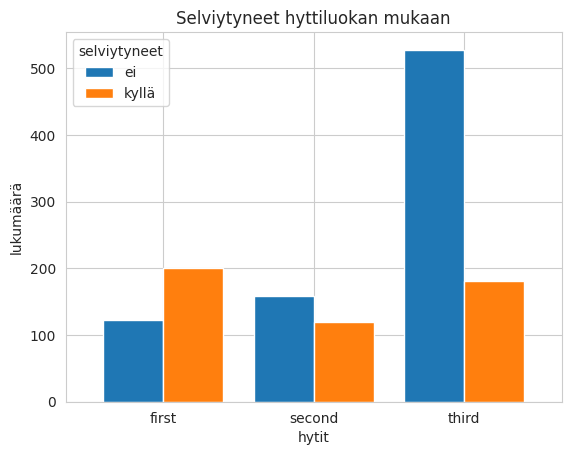

In [118]:
#Ristiintaulukointi

df3.plot(kind='bar', width=0.8, rot=0)
plt.ylabel('lukumäärä')
plt.title('Selviytyneet hyttiluokan mukaan')

Taseisessa määrin jokaisesta hyttiluokasta on selviytynyt henkilöitä, mutta on myös nähtävillä kolmannesta luokasta selkeästi menehtyi eniten ihmisiä, mutta myös kolmannessa luokassa matkustajia ollut enemmän kuin ensimäisessä ja toisessa luokassa matkustaneita.

Huomioitavaa on myös, että ensimmäisen luokan hytistä selvisi enemmän ihmisiä kuin menehtyi.

### Perhe

In [116]:
# Henkilöt, jotka matkustivat perheen jäsenen kanssa.

df[df['sibsp']!=0]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0.0, 10.0]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0.0, 10.0]"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON","(20.0, 30.0]"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(20.0, 30.0]"
6,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0000,1,0,13502,77.9583,D7,S,10,NaN,"Hudson, NY","(60.0, 70.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1290,3,1,"Wilkes, Mrs. James (Ellen Needs)",female,47.0000,1,0,363272,7.0000,NaN,S,NaN,NaN,NaN,"(40.0, 50.0]"
1299,3,0,"Yasbeck, Mr. Antoni",male,27.0000,1,0,2659,14.4542,NaN,C,C,NaN,NaN,"(20.0, 30.0]"
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,"(10.0, 20.0]"
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,"(10.0, 20.0]"


In [117]:
df[(df['parch']!=0) & (df['age']< 18)]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
94,1,1,"Dodge, Master. Washington",male,4.0000,0,2,33638,81.8583,A34,S,5,NaN,"San Francisco, CA","(0, 10]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1244,3,1,"Thomas, Mrs. Alexander (Thamine ""Thelma"")",female,16.0000,1,1,2625,8.5167,NaN,C,14,NaN,NaN,"(10, 20]"
1256,3,1,"Touma, Master. Georges Youssef",male,7.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,"(0, 10]"
1257,3,1,"Touma, Miss. Maria Youssef",female,9.0000,1,1,2650,15.2458,NaN,C,C,NaN,NaN,"(0, 10]"
1263,3,0,"van Billiard, Master. Walter John",male,11.5000,1,1,A/5. 851,14.5000,NaN,S,NaN,1.0,NaN,"(10, 20]"


418 henkilöä matkusti perheen jäsenen kanssa, joista lapsia oli 112.

In [126]:
df[df['age']<18]

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,ageclass
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON","(0, 10]"
53,1,0,"Carrau, Mr. Jose Pedro",male,17.0000,0,0,113059,47.1000,NaN,S,NaN,NaN,"Montevideo, Uruguay","(10, 20]"
54,1,1,"Carter, Master. William Thornton II",male,11.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
55,1,1,"Carter, Miss. Lucile Polk",female,14.0000,1,2,113760,120.0000,B96 B98,S,4,NaN,"Bryn Mawr, PA","(10, 20]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1265,3,0,"Van Impe, Miss. Catharina",female,10.0000,0,2,345773,24.1500,NaN,S,NaN,NaN,NaN,"(0, 10]"
1275,3,0,"Vander Planke, Mr. Leo Edmondus",male,16.0000,2,0,345764,18.0000,NaN,S,NaN,NaN,NaN,"(10, 20]"
1279,3,0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0000,0,0,350406,7.8542,NaN,S,NaN,NaN,NaN,"(10, 20]"
1300,3,1,"Yasbeck, Mrs. Antoni (Selini Alexander)",female,15.0000,1,0,2659,14.4542,NaN,C,NaN,NaN,NaN,"(10, 20]"


Yhteensä lapsia oli 154.